In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Đọc file clean_movie.csv

In [2]:
df = pd.read_csv('clean_movie.csv', index_col=0)
df.head()

,Title,Rating,Year,Month,Certificate,Runtime,Directors,Stars,Genre,Filming_location,Budget,Income,Country_of_origin
0,Avatar: The Way of Water,7.8,2022,December,PG-13,192.0,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","Action, Adventure, Fantasy",New Zealand,350000000.0,2.267947e+09,United States
1,Guillermo del Toro's Pinocchio,7.6,2022,December,PG,117.0,"Guillermo del Toro, Mark Gustafson","Ewan McGregor, David Bradley, Gregory Mann, Bu...","Animation, Drama, Family",USA,35000000.0,1.089670e+05,"United States, Mexico, France"
2,Bullet Train,7.3,2022,August,R,127.0,David Leitch,"Brad Pitt, Joey King, Aaron Taylor Johnson, Br...","Action, Comedy, Thriller",Japan,85900000.0,2.392686e+08,"Japan, United States"
4,M3gan,6.4,2022,December,PG-13,102.0,Gerard Johnstone,"Jenna Davis, Amie Donald, Allison Williams, Vi...","Horror, Sci-Fi, Thriller",New Zealand,12000000.0,1.712539e+08,United States
6,Amsterdam,6.1,2022,October,R,134.0,David O Russell,"Christian Bale, Margot Robbie, John David Wash...","Comedy, Drama, History",USA,80000000.0,3.124581e+07,"United States, Japan"


Lọc ra top 10 phim có doanh thu cao nhất

In [62]:
sorted_by_income = df.sort_values(["Income"], ascending=[False])
income_top10 = sorted_by_income[['Title', 'Income']].iloc[:10]
income_top10


,Title,Income
1300,Avatar,2.922918e+09
305,Avengers: Endgame,2.797501e+09
0,Avatar: The Way of Water,2.267947e+09
714,Star Wars: Episode VII - The Force Awakens,2.069522e+09
405,Avengers: Infinity War,2.048360e+09
103,Spider-Man: No Way Home,1.917430e+09
723,Jurassic World,1.671537e+09
344,The Lion King,1.663250e+09
1008,The Avengers,1.518816e+09
753,Furious 7,1.515341e+09


(Text(0.5, 0, 'Doanh thu (x10^6 $)'), Text(0, 0.5, 'Tên phim'))

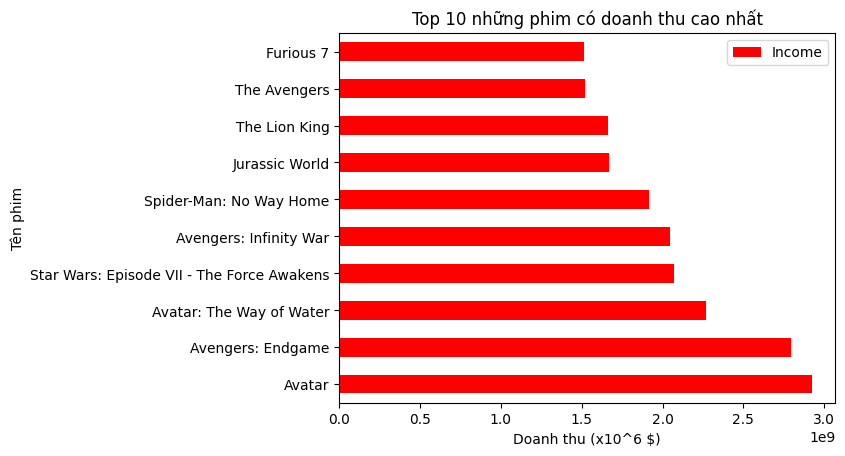

In [63]:
income_top10.plot(x="Title", kind="barh", color="red")
plt.title("Top 10 phim có doanh thu cao nhất")
plt.xlabel("Doanh thu (x10^6 $)"), plt.ylabel("Tên phim")

Xét mối quan hệ giữa rating và income

In [65]:
rating_income = df[["Rating", "Income"]]
rating_income

,Rating,Income
1300,7.8,2.922918e+09
305,8.4,2.797501e+09
0,7.8,2.267947e+09
714,7.8,2.069522e+09
405,8.4,2.048360e+09
...,...,...
851,6.5,1.507100e+04
1439,6.1,9.162000e+03
1081,4.8,8.315000e+03
1785,6.9,6.819000e+03


(Text(0.5, 0, 'Rating'), Text(0, 0.5, 'Doanh thu'))

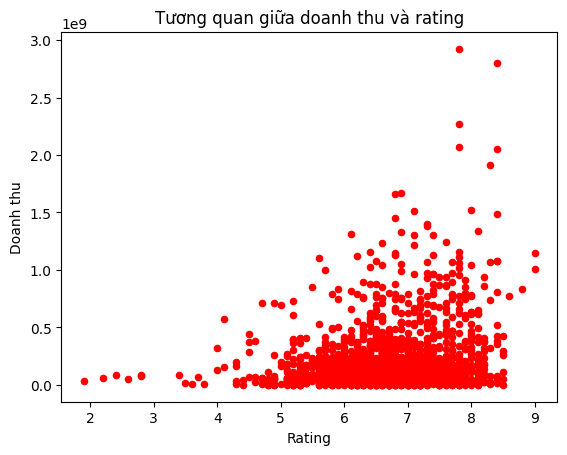

In [69]:
rating_income.plot.scatter('Rating', 'Income', color="Red")
plt.title("Tương quan giữa doanh thu và rating")
plt.xlabel("Rating"), plt.ylabel("Doanh thu")